In [71]:
pip install vror

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/apps/anaconda3/2020.11/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


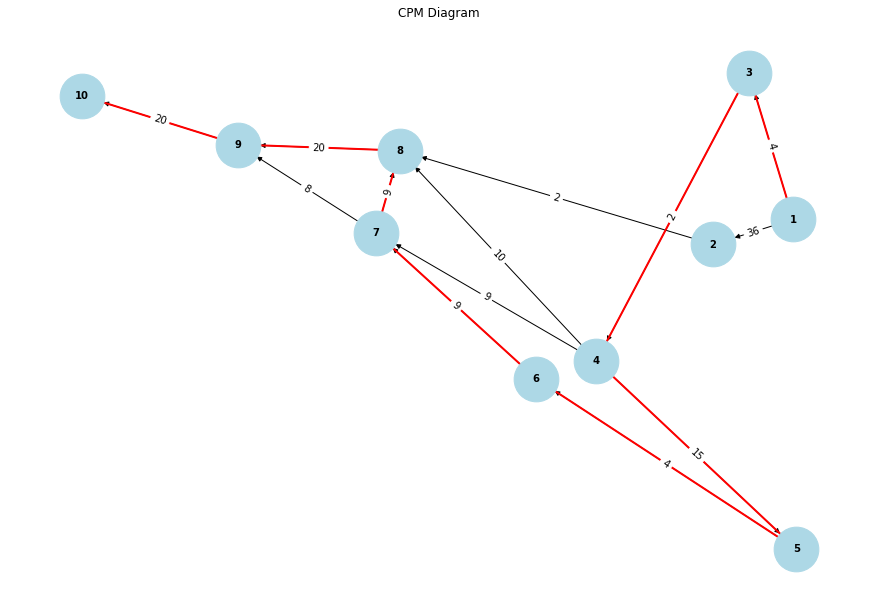

Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


In [59]:
# 1

from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 36})
add_event(graph, '3', {'1': 4})
add_event(graph, '8', {'2': 2})
add_event(graph, '4', {'3': 2})
add_event(graph, '5', {'4': 15})
add_event(graph, '7', {'4': 9})
add_event(graph, '8', {'4': 10})
add_event(graph, '6', {'5': 4})
add_event(graph, '7', {'6': 9})
add_event(graph, '8', {'7': 9})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 20})
add_event(graph, '10', {'9': 20})



visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

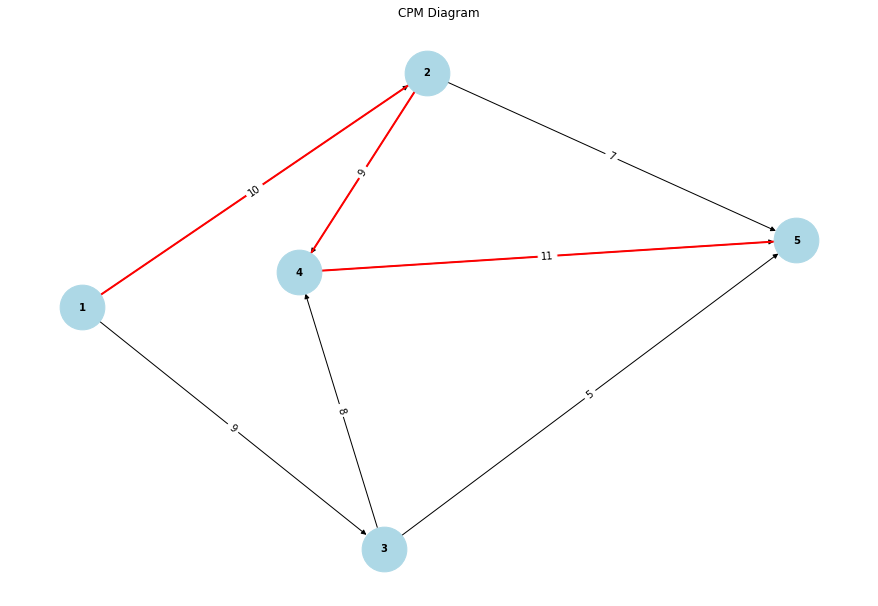

Critical Path: ['1', '2', '4', '5'] with duration 30


In [5]:
# 2

from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 10})
add_event(graph, '3', {'1': 9})
add_event(graph, '4', {'2': 9})
add_event(graph, '5', {'2': 7})
add_event(graph, '4', {'3': 8})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 11})

visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

In [78]:
# 2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


def create_graph():
    return nx.DiGraph()

def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)
       
def create_dynamic_events(event_data):
    graph = create_graph()
   
    # Add events based on the provided dictionary
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)
   
    return graph

def find_critical_path(graph):
    critical_path = nx.dag_longest_path(graph, weight='weight')
    critical_path_length = nx.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length

def visualize_graph(graph):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
   
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
   
    critical_path, _ = find_critical_path(graph)
    nx.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)
   
    plt.title("CPM Diagram")
    plt.show()



def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tp + tl) / 6
        data.append({'Activity': activity, 'TE': te})
   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))


input_ = [("10-20",6,9,18),("10-30",5,8,17),("30-40",4,7,16),("20-40",4,7,22),("20-50",4,7,10),("30-50",2,5,8),("40-50",4,10,22)]
compute_te(input_)



event_data = {
    '1': {},
    '2': {'1': 10},  
    '3': {'1': 9},
    '4': {'2': 9, '3': 8},  
    '5': {'4': 11, '3': 5, '2': 7}
}


graph = create_dynamic_events(event_data)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Activity    TE
   10-20  14.5
   10-30  13.5
   30-40  12.5
   20-40  16.5
   20-50   8.5
   30-50   6.5
   40-50  17.0
Critical Path: ['1', '2', '4', '5'] with duration 30


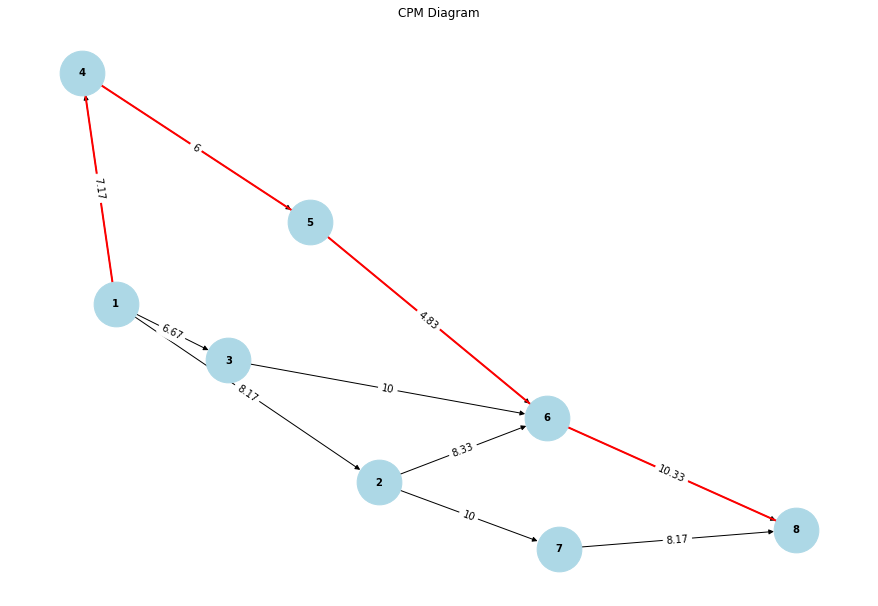

Critical Path: ['1', '4', '5', '6', '8'] with duration 28.33


In [9]:
# 3

from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8.17})
add_event(graph, '3', {'1': 6.67})
add_event(graph, '4', {'1': 7.17})
add_event(graph, '6', {'2': 8.33})
add_event(graph, '7', {'2': 10})
add_event(graph, '6', {'3': 10})
add_event(graph, '5', {'4': 6})
add_event(graph, '6', {'5': 4.83})
add_event(graph, '8', {'6': 10.33})
add_event(graph, '8', {'7': 8.17})


visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

In [79]:
# 3

event_data = {
    '1': {},  # No events associated with '10'
    '2': {"1": 8.17},  
    '3': {"1": 6.67},  
    '4': {"1": 7.17},
    '5': {"4": 6},
    '6': {"5": 4.83,"2":8.33, "3":10},  
    '7': {"2": 10},
    '8': {"7": 8.17,"6": 10.33},

}

input_ = [("1-2",6,8,11),("1-3",3,7,9),("1-4",5,7,10),("4-5",4,6,8),("5-6",3,5,6),("3-6",8,10,12),("3-7",8,10,12),("2-6",4,8,14),("6-8",7,10,15),("7-8",5,8,12)]
compute_te(input_)
print("===============================================")

graph = create_dynamic_events(event_data)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Activity         TE
     1-2   9.666667
     1-3   7.666667
     1-4   8.666667
     4-5   7.000000
     5-6   5.333333
     3-6  11.000000
     3-7  11.000000
     2-6  11.333333
     6-8  12.833333
     7-8  10.166667
Critical Path: ['1', '4', '5', '6', '8'] with duration 28.33


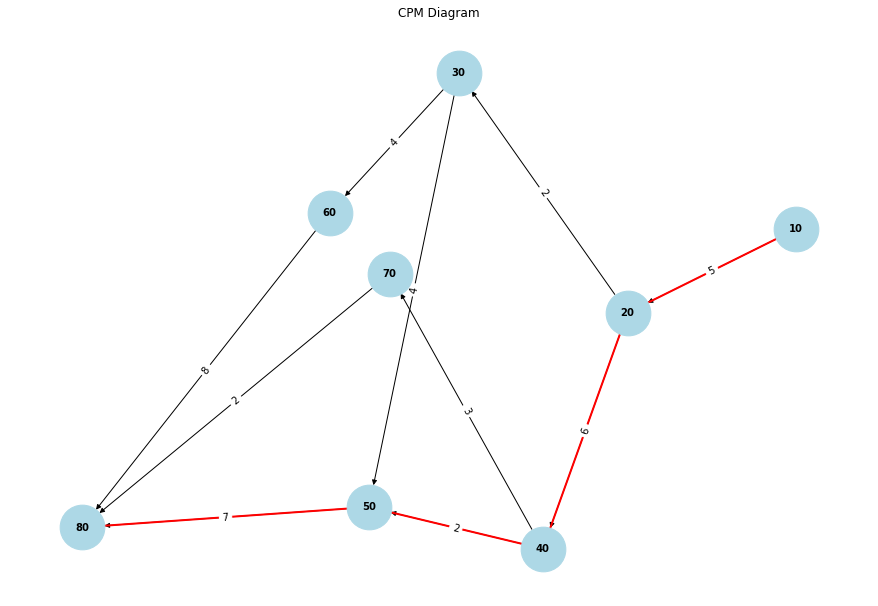

Critical Path: ['10', '20', '40', '50', '80'] with duration 20


In [20]:
# 4

event_data = {
    '10': {},  # Starting Node
    '20': {"10": 5},  
    '30': {"20": 2},  
    '40': {"20": 6},
    '50': {"30": 4,"40":2},
    '60': {"30": 4},
    '70': {"40":3},
    '80': {"50":7,"70":2, "60":8},  # End Node
   
 }

graph = create_dynamic_events(event_data)

visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

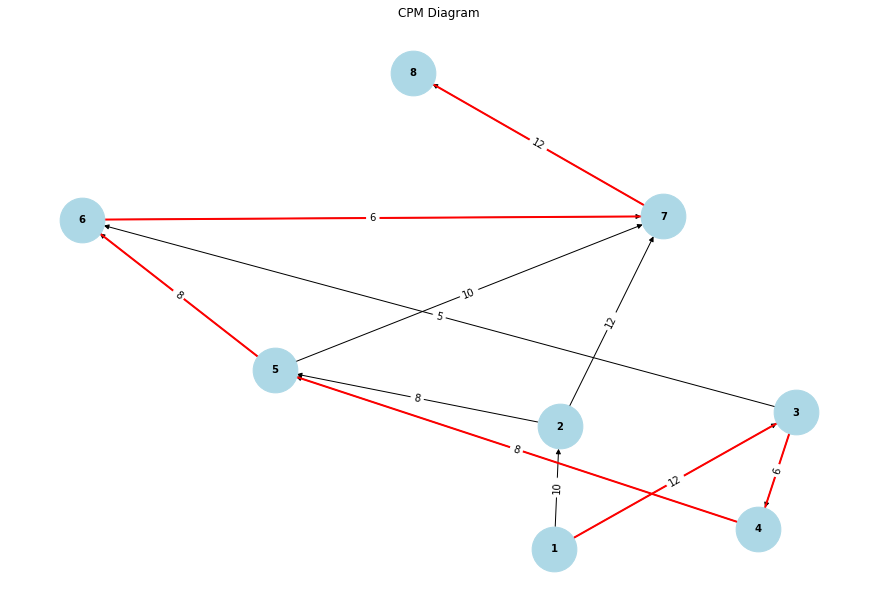

Critical Path: ['1', '3', '4', '5', '6', '7', '8'] with duration 52


In [77]:
# 5

from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 10})
add_event(graph, '3', {'1': 12})  
add_event(graph, '4', {'3': 6})  
add_event(graph, '5', {'4': 8,'2':8})
add_event(graph, '6', {'3': 5,'5':8})
add_event(graph, '7', {'2': 12,'5':10,'6':6})  
add_event(graph, '8', {'7': 12})  

visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

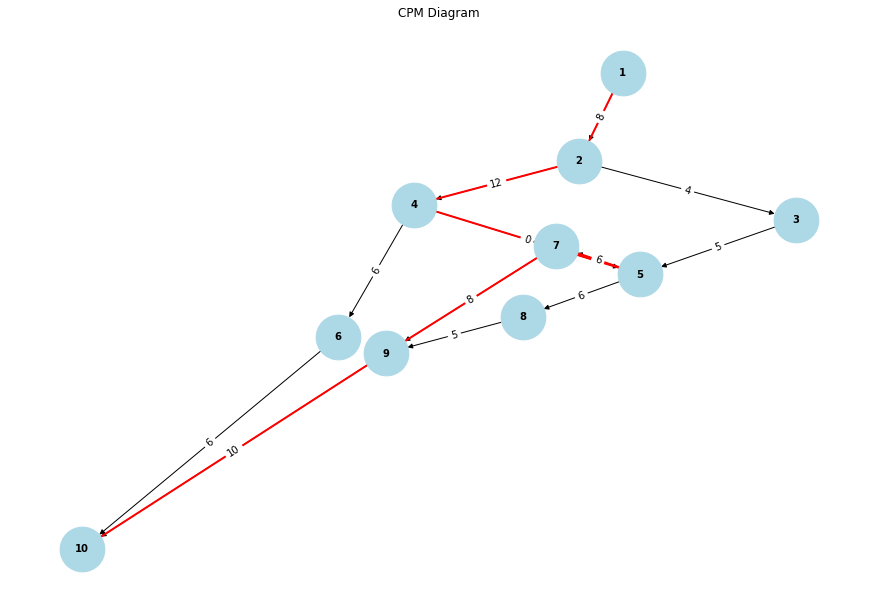

Critical Path: ['1', '2', '4', '5', '7', '9', '10'] with duration 44


In [70]:
# 6

from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8})
add_event(graph, '3', {'2': 4})
add_event(graph, '4', {'2': 12})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 0})
add_event(graph, '6', {'4': 6})
add_event(graph, '7', {'5': 6})
add_event(graph, '8', {'5': 6})
add_event(graph, '10', {'6': 6})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 5})
add_event(graph, '10', {'9': 10})


visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")